In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Данные о средней температуре по месяцам с 2014 по 2023 год
temperature_data = [
    [-7.0, 0.0, 2.2, 6.5, 13.0, 15.0, 21.2, 18.8, 13.5, 5.2, 0.8, -1.0],
    [-2.7, -0.6, 2.6, 5.1, 11.8, 15.9, 16.9, 18.3, 14.0, 5.6, 3.1, 2.1],
    [-11.2, 0.0, 1.0, 6.3, 14.7, 16.5, 19.0, 17.2, 12.9, 5.0, -1.8, -1.2],
    [-3.9, -3.5, 1.3, 2.8, 9.4, 13.6, 16.5, 17.4, 12.5, 5.6, 2.3, 0.4],
    [-2.9, -7.7, -4.4, 6.0, 15.1, 16.2, 20.9, 19.2, 14.5, 7.3, 2.8, -3.2],
    [-6.5, -0.5, 0.1, 7.3, 12.1, 18.7, 16.6, 17.0, 12.2, 6.1, 1.9, 1.8],
    [1.5, 0.6, 2.2, 4.2, 10.0, 19.1, 17.6, 17.2, 14.3, 9.1, 3.9, -0.8],
    [-4.6, -9.2, -0.8, 5.6, 12.1, 21.4, 23.1, 16.9, 10.2, 8.0, 2.2, -7.5],
    [-4.1, -1.2, -0.3, 4.3, 10.0, 17.6, 19.9, 20.6, 10.3, 8.1, 0.5, -3.2],
    [-2.3, -3.0, -0.4, 6.8, 12.0, 17.3, 18.2, 19.9, 16.4, 5.0, 0.1, -4.4]
]

# Создание списка дат
dates = [f"{month + 1:02d}.{year}" for year in range(2014, 2024) for month in range(12)]

# Преобразование данных в одномерный массив
temperature_flat = np.array(temperature_data).flatten()

# Создание датафрейма
df = pd.DataFrame({'Date': dates, 'Temp': temperature_flat})

In [84]:
# df

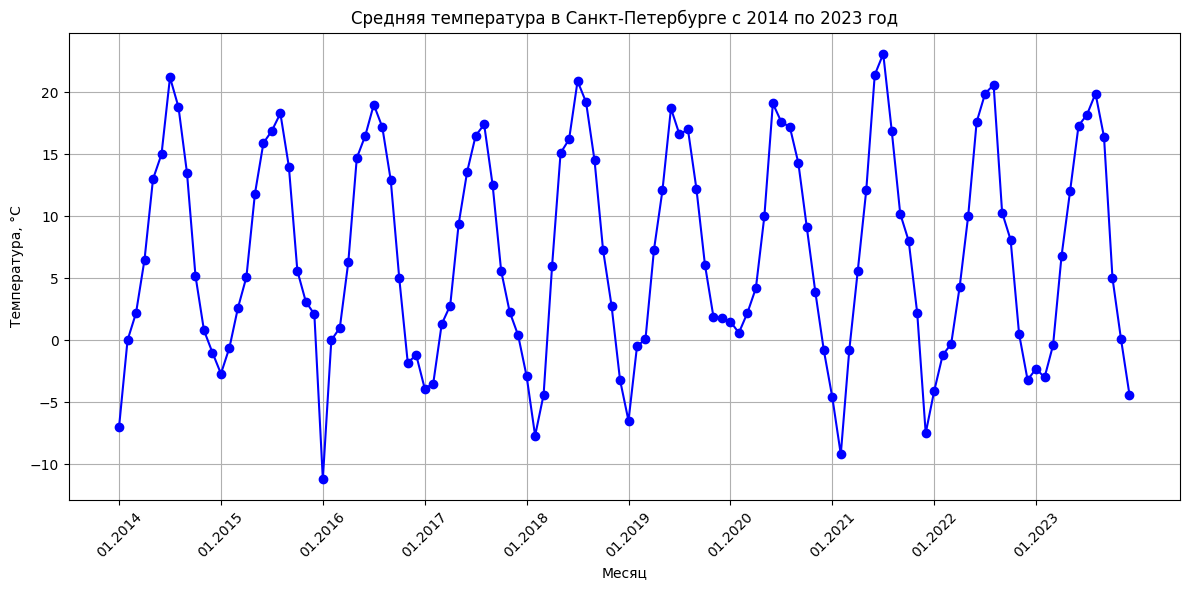

In [85]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Temp'], marker='o', linestyle='-', color='b')
plt.xlabel('Месяц')
plt.ylabel('Температура, °C')
plt.title('Средняя температура в Санкт-Петербурге с 2014 по 2023 год')
n = 12
plt.xticks(df.index[::n], df['Date'][::n], rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

In [86]:
y = np.array(df['Temp'])[:-12] + 100 #данные для модели
y_test = np.array(df['Temp'])[-12:] + 100 #данные для првоерки предсказания

In [87]:
def holtwinters(y, alpha, beta, gamma, c, debug=True):
    # Линейная аппроксимация данных
    ylen = len(y)
    if ylen % c !=0:
        return None
    fc = float(c)
    ybar2 = sum([y[i] for i in range(c, 2 * c)]) / fc
    ybar1 = sum([y[i] for i in range(c)]) / fc
    a0 = (ybar2 - ybar1) / fc
    if debug: print ("a0 = ", a0)

    tbar  = sum(i for i in range(1, c+1)) / fc
    b0 = ybar1  - a0 * tbar
    if debug: print ("b0 = ", b0)

    # Значения аппроксимация
    I =[y[i] / (b0 + (i+1) * a0) for i in range(0, ylen)]
    if debug: print ("Initial indices = ", len(I), I)

    # Сезонные коэффициенты
    S=[0] * (ylen + c)
    for i in range(c):
        S[i] =(I[i] + I[i+c]) / 2.0


    # Значение функции
    if debug: print ("Use Holt Winters formulae")
    F = [0] * (ylen+ c)

    At = a0
    Bt = b0
    for i in range(ylen):
        Atm1 = At
        Btm1 = Bt

        Bt = alpha * y[i] / S[i] + (1.0-alpha) * (Atm1 + Btm1)
        At = beta * (Bt - Btm1) + (1- beta) * Atm1
        S[i+c] = gamma * y[i] / Bt + (1.0 - gamma) * S[i]


        F[i]=(b0 + a0 * (i+1)) * S[i]
        # print ("i=", i+1, "y=", y[i], "S=", S[i], "Atm1=", Atm1, "Btm1=",Btm1, "At=", At, "Bt=", Bt, "S[i+c]=", S[i+c], "F=", F[i])
        formatted_output = "i={:d} y={:.2f} S={:.2f} Atm1={:.2f} Btm1={:.2f} At={:.2f} Bt={:.2f} S[i+c]={:.2f} F={:.2f}".format(i+1, y[i], S[i], Atm1, Btm1, At, Bt, S[i+c], F[i])
        if debug: print(formatted_output)

    # Предсказание для следующего периода
    forecast = []
    for m in range(c):
        forecast.append((Bt + At* (m+1))* S[ylen + m])

    return forecast

In [88]:
# f = holtwinters(ts[:-12], 0.2, 0.1, 0.05, 12, debug=True)
f = holtwinters(y, 0.2, 0.2, 0.2, 12, debug=True)
f = np.array(f)

a0 =  0.027083333333330017
b0 =  107.17395833333336
Initial indices =  108 [0.8675288836201449, 0.9325911462128055, 0.9528674792405185, 0.9927081007078287, 1.053030082413582, 1.0713973777937364, 1.1288748314236094, 1.1062418158009601, 1.0566228023389999, 0.979107487372391, 0.9379198046000409, 0.9209391563871744, 0.9048970695083556, 0.9241944387947819, 0.9537070209243106, 0.9766996118215349, 1.038701622971286, 1.0765226646025836, 1.0855379615209764, 1.098262206620442, 1.058076242591823, 0.9798664205144071, 0.9564284678938981, 0.9469138545661818, 0.8233578334315272, 0.9269719880652362, 0.9360067188601112, 0.984876707040487, 1.0624366804642957, 1.078838974794294, 1.1017137125939078, 1.0847771382292548, 1.0447154079714693, 0.9713696504803855, 0.9082343420330076, 0.9135547999961481, 0.8883667632813034, 0.8918411552346579, 0.9359678925130662, 0.9495896157880059, 1.0103027329658605, 1.0488271670241116, 1.075332916686699, 1.083369380280879, 1.0378926934276418, 0.9739919103023559, 0.94331902141

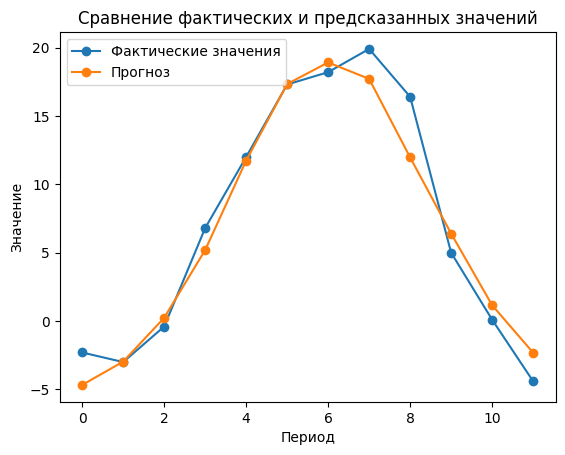

In [89]:
# График для сравнения предсказанных и тестовых данных
plt.plot(y_test - 100, label='Фактические значения', marker='o')
plt.plot(f - 100, label='Прогноз', marker='o')
plt.title('Сравнение фактических и предсказанных значений')
plt.xlabel('Период')
plt.ylabel('Значение')
plt.legend()
plt.show()

Оптимизация параметров

In [90]:
from scipy.optimize import minimize

def objective(params):
    alpha, beta, gamma = params
    f = holtwinters(y, alpha, beta, gamma, 12, debug=False)
    error = np.sum((f - y_test)**2)
    return error

initial_params = [0.2, 0.2, 0.2]

result = minimize(objective, initial_params)

optimal_params = result.x

print("Оптимальные параметры:", optimal_params)


Оптимальные параметры: [0.14884058 0.94286184 0.14444231]


In [91]:
f1 = holtwinters(y, optimal_params[0], optimal_params[1], optimal_params[2], 12, debug=False)
f1 = np.array(f1)

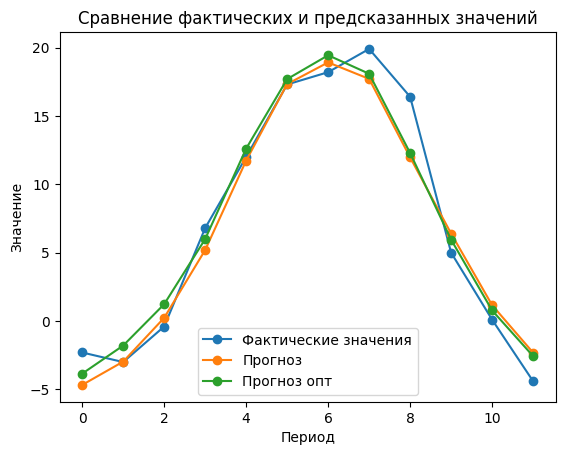

In [92]:
# График для сравнения предсказанных и тестовых данных
plt.plot(y_test - 100, label='Фактические значения', marker='o')
plt.plot(f - 100, label='Прогноз', marker='o')
plt.plot(f1 - 100, label='Прогноз опт', marker='o')
plt.title('Сравнение фактических и предсказанных значений')
plt.xlabel('Период')
plt.ylabel('Значение')
plt.legend()
plt.show()